In [1]:
#Along with the main package, some functionalities relied on other 
# python packages. Installing them here. 
!pip install https://github.com/pyspeckit/pyspeckit/archive/master.zip
!pip install lineid_plot


  Using cached https://github.com/pyspeckit/pyspeckit/archive/master.zip
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [2]:
import numpy as np
from astropy import units as u
import pyspeckit 

print(pyspeckit.__version__)

1.0.4.dev


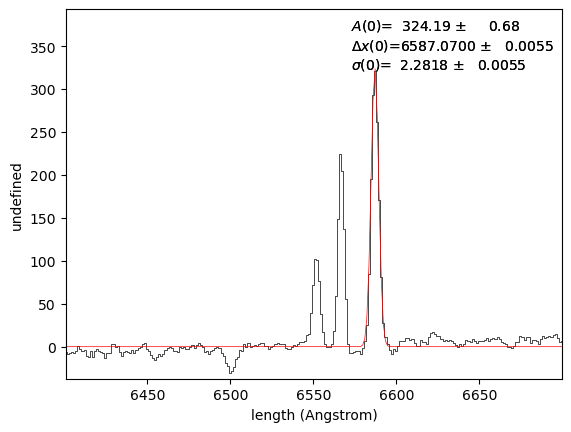

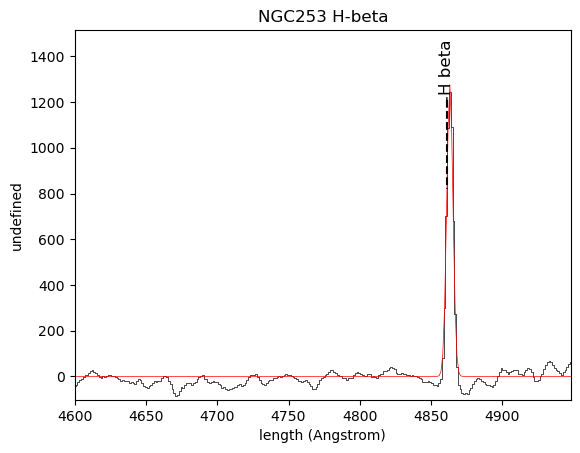

In [3]:
#I ran into some unsolvable issues with the spectral_cube package,
# which is required to use any cube object. Instead I will be fitting
# the two spectrums from ngc253.


#ngc253_ha

ha_data = np.loadtxt('ngc253_ha.tab') 
ha = pyspeckit.Spectrum(data = ha_data[:,1]-300, 
                        xarr = ha_data[:,0]*u.AA)
ha.plotter()
ha.specfit(fittype = 'gaussian')
#an example of a plot with annotations. 
ha.plotter.savefig('ha_with_fit')

#ngc253_hb

#the Spectrum object does not read .tab files, but does read numpy
# arrays.
hb_data = np.loadtxt('ngc253_hb.tab')

#There are additional parameters here, such as y-axis units that I
# did not include (since the y-axis was unitless here.)
#Furthermore, the fitting did not work properly with the y-data as 
#given and would fit a straight line across the noise data. To 
# resolve this and get a nice fit, I shifted the data down.
hb = pyspeckit.Spectrum(data = hb_data[:,1]-700, 
                        xarr = hb_data[:,0]*u.AA)
hb.plotter()

#the first specfit call creates the fit. The clear command removes 
# the fit and annotations from the plot. The third command puts the 
# fit back on, but omits the annotations. This sequence is necessary
# to get a fit without annotations. 
hb.specfit()
hb.specfit.clear()
hb.specfit.plot_fit(annotate=False)

#as previously stated, the line_id functionality relies on a separate
# python package, lineid_plot. Lines can be id'd manually or through
# measurements. (position gotten from online)
hb.plotter.line_ids(['H beta'], [4861.35], xval_units = 'angstrom')

#can label x, y axis and title the figure. 
hb.plotter.label(title = 'NGC253 H-beta')
hb.plotter.savefig('hb_with_fit')
